In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam (2).csv to spam (2) (1).csv


In [ ]:
import pandas as pd

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')

KeyError: 'spam(2).csv'

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
df = df.rename(columns={'v1': 'type', 'v2': 'text'})

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()


In [ ]:
df['type']=encoder.fit_transform(df['type'])
y = df['type'].values


In [ ]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
type,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['type'].value_counts()

,count
type,
0,4516
1,653


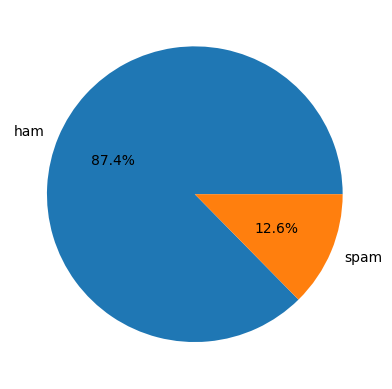

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,type,text,num_characters,num_words),num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",24
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,37
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:nltk.sent_tokenize(x))

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:

spam_words = {
    "free","!","guaranteed", "bonus", "amazing", "unlimited", "debt",
    "investment", "loan", "affair", "prescription", "urgent", "hurry", "expires",
    "today", "flash", "time-sensitive", "click", "read", "delete", "see",
    "selected","money","miss","chance","only","lifetime","sale","selected","win", "final","prize"
}

In [ ]:
df['text']=df['text']=str.lower

In [ ]:

def count_spam_words(text):
    words = word_tokenize(str(text))
    word_counts = Counter(words)
    return sum(word_counts[word] for word in spam_words if word in word_counts)


In [ ]:
import re

def contains_url(text):
    url_pattern = r("https?://\S+|www\.\S+")

In [ ]:
df["spam_word_count"] = df["text"].apply(count_spam_words)

In [ ]:
df_filtered = df[df['type'] == 0][['num_characters', 'num_words', 'num_sentences']]
df_description = df_filtered.describe()
print(df_description)

       num_characters    num_words
count     4516.000000  4516.000000
mean        70.459256    17.123782
std         56.358207    13.493970
min          2.000000     1.000000
25%         34.000000     8.000000
50%         52.000000    13.000000
75%         90.000000    22.000000
max        910.000000   220.000000


In [ ]:
df_filtered = df[df['type'] == 1] [['num_characters', 'num_words', 'num_sentences']]
df_description = df_filtered.describe()
print(df_description)

       num_characters   num_words
count      653.000000  653.000000
mean       137.891271   27.667688
std         30.137753    7.008418
min         13.000000    2.000000
25%        132.000000   25.000000
50%        149.000000   29.000000
75%        157.000000   32.000000
max        224.000000   46.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

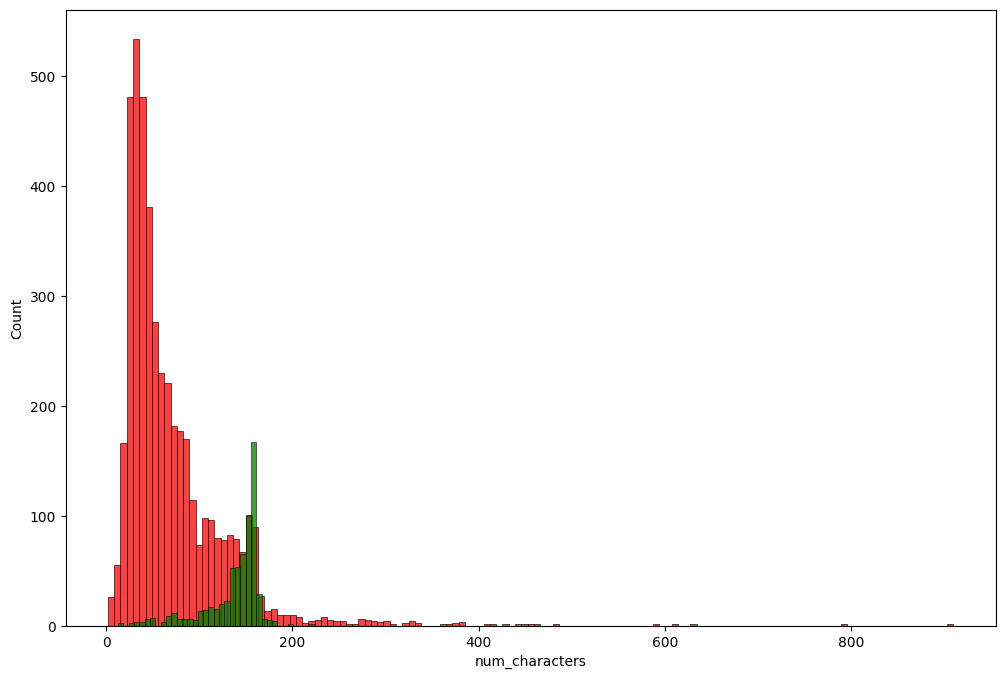

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['type']==0] ['num_characters'],color='red')
sns.histplot(df[df['type']==1] ['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

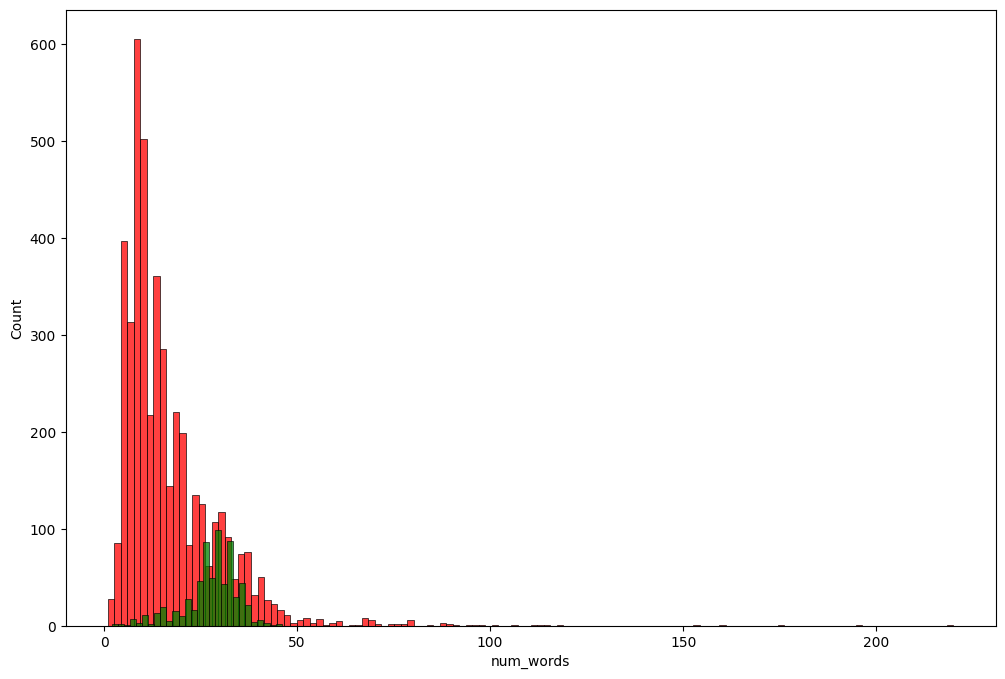

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['type']==0] ['num_words'],color='red')
sns.histplot(df[df['type']==1] ['num_words'],color='green')

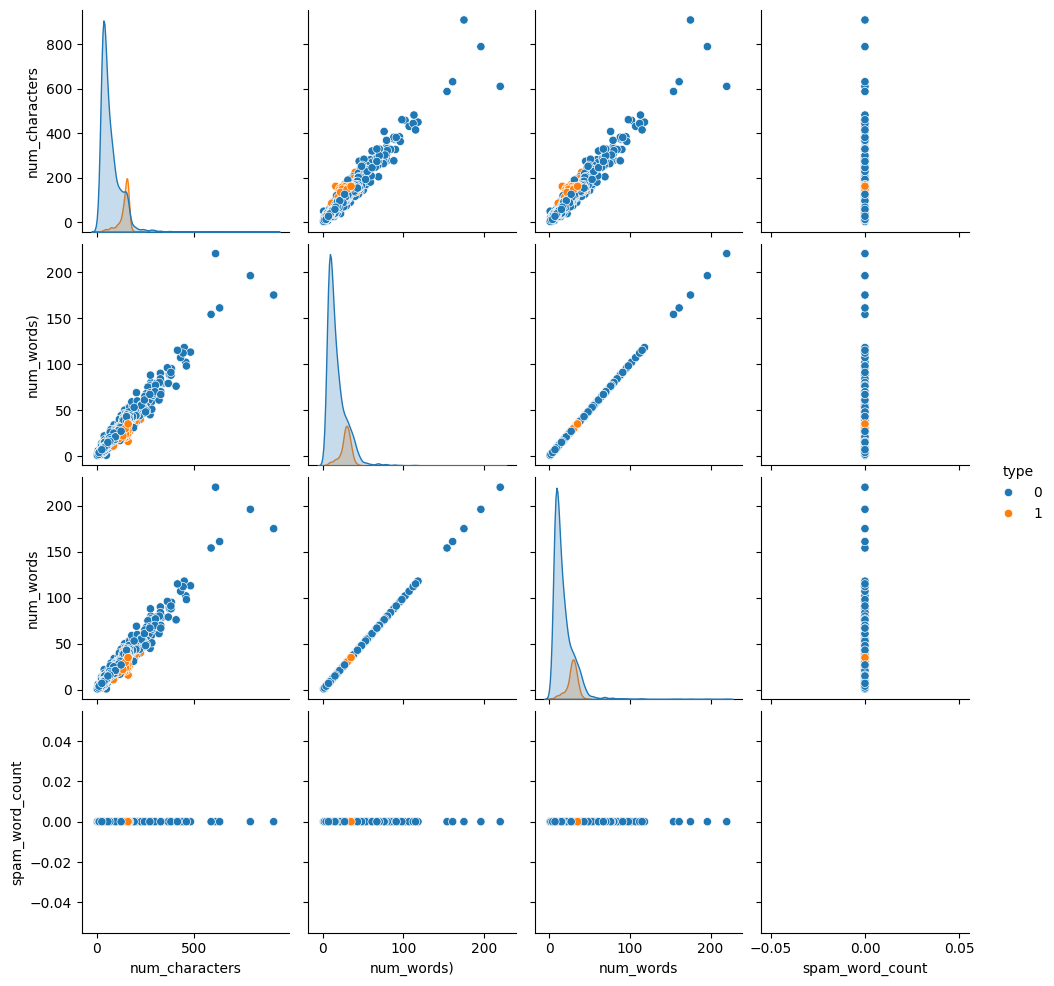

In [ ]:
sns.pairplot(df,hue='type')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
import string
stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    # **Change 1: Assign the result to a variable**
    transformed_text = " ".join(y)

    # **Change 2: Print intermediate results for debugging**
    print(f"Original Text: {text}\nTransformed Text: {transformed_text}\n---")

    return transformed_text

df['transformed_text'] = df['text'].apply(transform_text)

spam_list = df[df['type'] == 1]['transformed_text'].tolist()
print(spam_list)

# **Change 3: Check for empty spam messages**
empty_spam_messages = df[(df['type'] == 1) & (df['transformed_text'] == '')]
print(f"Number of empty spam messages: {len(empty_spam_messages)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
Original Text: ['means', 'fat', 'head']
Transformed Text: mean fat head
---
Original Text: ['sounds', 'like', 'plan', 'cardiff', 'still', 'still', 'cold', 'sitting', 'radiator']
Transformed Text: sound like plan cardiff still still cold sit radiat
---
Original Text: ['serious', 'like', 'proper', 'tongued']
Transformed Text: seriou like proper tongu
---
Original Text: ['good', 'wondering', 'wont', 'say', 'hi', 'smiling', 'coping', 'long', 'distance']
Transformed Text: good wonder wont say hi smile cope long distanc
---
Original Text: ['noe', 'da', 'car', 'later', 'c', 'lar', 'wearing', 'shorts']
Transformed Text: noe da car later c lar wear short
---
Original Text: ['important', 'customer', 'service', 'announcement', 'call', 'freephone', '0800', '542', '0825']
Transformed Text: import custom servic announc call freephon 0800 542 0825
---
Original Text: ['yeah', 'whatever', 'lol']
Transformed Text: yeah whatev lol
---
Original Text: ['to

In [ ]:
 import string
 string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text('Hi How % Are & You Ritesh?')

'hi ritesh'

In [ ]:
transform_text('Did you like the ppt which i prepared recently on the topic of Phising of SMS ?')

'like ppt prepar recent topic phise sm'

In [ ]:
transform_text('I did a course on Machine learning which i loved it a lot.How about You? ')

'cours machin learn love'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('playing')

'play'

In [ ]:
import pandas as pd
import nltk

try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")
else:
    df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
    df = df.rename(columns={'v1': 'type', 'v2': 'text'})
    # Define transform_text before applying it
    def transform_text(text):
        text = text.lower()  # Convert to lowercase
        text = nltk.word_tokenize(text)  # Tokenize the text
        y = []
        for i in text:
            if i.isalnum():  # Check if it's alphanumeric
                y.append(i)
        return " ".join(y)  # Join the list of words back into a string
    df['transformed_text'] = df['text'].apply(transform_text)  # Apply the function to create the new column
    print(df.head())

# This line will only execute if the 'try' block was successful:
if 'df' in locals():  # Check if df is defined
    df.head()

   type                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                    transformed_text  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in 2 a wkly comp to win fa cup fina...  
3        u dun say so early hor u c already then say  
4  nah i do think he goes to usf he lives around ...  


In [ ]:
df.head()

,type,text,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goes to usf he lives around ...


In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,type,text,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goes to usf he lives around ...


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Download the punkt_tab resource
nltk.download('punkt_tab')

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Load the 'spam.csv' file into a pandas DataFrame, handling potential errors
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")
else:
    # Drop unnecessary columns and rename relevant columns
    df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
    df = df.rename(columns={'v1': 'type', 'v2': 'text'})

    # Ensure the 'text' column exists before applying transform_text
    if 'text' in df.columns:
        df['transformed_text'] = df['text'].apply(transform_text)
    else:
        print("Error: The 'text' column is not found in the DataFrame.")

    # Convert 'type' column to numerical values using LabelEncoder
    if 'df' in locals() and 'type' in df.columns:
        encoder = LabelEncoder()
        df['type'] = encoder.fit_transform(df['type'])  # Convert 'type' column
        y = df['type'].values  # Now y will contain 0 and 1
    else:
        print("Error: The DataFrame or 'type' column is not available.")

print(y) # Output the values of y to verify

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[0 0 1 ... 0 0 0]


In [ ]:
empty_spam_messages = df[(df['type'] == 1) & (df['transformed_text'] == '')]
print(f"Number of spam messages with empty transformed_text: {len(empty_spam_messages)}")

Number of spam messages with empty transformed_text: 0


In [ ]:
# Print the first few rows of the DataFrame
print(df.head())

# Initialize an empty list to store words from spam messages
spam_corpus = []

# Loop through spam messages in the 'transformed_text' column
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    if msg:  # Check if msg is not empty
        words = msg.split()  # Split the message into words
        for word in words:
            spam_corpus.append(word)  # Add each word to spam_corpus

# Print the first few rows again (if needed)
print(df.head())

# Print the total number of words in spam_corpus
print(len(spam_corpus))


   type                                               text  \
0     0  Go until jurong point, crazy.. Available only ...   
1     0                      Ok lar... Joking wif u oni...   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...   
3     0  U dun say so early hor... U c already then say...   
4     0  Nah I don't think he goes to usf, he lives aro...   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  
   type                                               text  \
0     0  Go until jurong point, crazy.. Available only ...   
1     0                      Ok lar... Joking wif u oni...   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...   
3     0  U dun say so early hor... U c already th

In [ ]:
# Print the number of spam messages
print(f"Number of spam messages: {df[df['type'] == 1].shape[0]}")

# Initialize an empty list to store words from spam messages
spam_corpus = []

# Loop through spam messages in the 'transformed_text' column
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    if msg:  # Check if msg is not empty
        words = msg.split()  # Split the message into words
        if words:  # Check if there are any words after splitting
            for word in words:
                spam_corpus.append(word)  # Add each word to spam_corpus

# Print the first few rows again (if needed)
print(df.head())

# Print the total number of words in spam_corpus
print(f"Number of words in spam_corpus: {len(spam_corpus)}")


Number of spam messages: 747
   type                                               text  \
0     0  Go until jurong point, crazy.. Available only ...   
1     0                      Ok lar... Joking wif u oni...   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...   
3     0  U dun say so early hor... U c already then say...   
4     0  Nah I don't think he goes to usf, he lives aro...   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  
Number of words in spam_corpus: 11490


In [ ]:
#For Model Building - text to vector convert.Here,e used bag of words and as input naive-based through

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer() #how many times each word appears at each message and create table
Tfidf= TfidfVectorizer() #identify the imp word and which word occurs more in a document

In [ ]:
X = Tfidf.fit_transform(df['transformed_text']).toarray() #will read the vocabulary or unique word and create a table

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
import numpy as np
X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X) # takes the data and find the smallest and largest value

In [ ]:
X.shape #(sms,word)

(5572, 6709)

In [ ]:
y= df['type'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split   #applying train test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) #20%data at test state


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB #making and importing object
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score #its a high precision model for email classifier,spam classifier

In [ ]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) #output of gauusian naive bayes



0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) #precisison score matters a lot

0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) #bnb behaves much more better

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
#making dict. where keys= algorithm name and values=object

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train) #training the classifier
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred) #calculate the accuracy
    precision=precision_score(y_test,y_pred) #calculayte the precision
    return accuracy,precision




In [ ]:

train_classifier(svc,X_train,y_train,X_test,y_test) #tarining the SVC


(0.9291479820627803, 0.8211382113821138)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items(): #loop on the dict and use one model and train it and storing accuracy and precision
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print('for',name,'accuracy is',current_accuracy,'and precision is',current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC accuracy is 0.9291479820627803 and precision is 0.8211382113821138
for KN accuracy is 0.9067264573991032 and precision is 1.0
for DT accuracy is 0.905829596412556 and precision is 0.9206349206349206
for LR accuracy is 0.9695067264573991 and precision is 0.984375
for RF accuracy is 0.9605381165919282 and precision is 0.9913793103448276
for AdaBoost accuracy is 0.9121076233183857 and precision is 0.8947368421052632
for BgC accuracy is 0.9650224215246637 and precision is 0.976
for ETC accuracy is 0.967713004484305 and precision is 1.0
for GBDT accuracy is 0.9381165919282511 and precision is 0.9587628865979382
for xgb accuracy is 0.9650224215246637 and precision is 0.983739837398374


In [ ]:
#convert it into the dataframe
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df #also sorting the accuracy and precision in the dataframe

,Algorithm,Accuracy,Precision
1,KN,0.906726,1.000000
7,ETC,0.967713,1.000000
4,RF,0.960538,0.991379
3,LR,0.969507,0.984375
9,xgb,0.965022,0.983740
6,BgC,0.965022,0.976000
8,GBDT,0.938117,0.958763
2,DT,0.905830,0.920635
5,AdaBoost,0.912108,0.894737
0,SVC,0.929148,0.821138


In [ ]:
import pandas as pd
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
performance_df=pd.merge(performance_df,temp_df,on='Algorithm')

In [ ]:
new_df_scaled = performance_df.merge(temp_df,on='Algorithm') #Change new_df to performance_df

In [ ]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.906726,1.000000,0.906726,1.000000,0.906726,1.000000,0.906726,1.000000,0.906726,1.000000
1,ETC,0.967713,1.000000,0.967713,1.000000,0.967713,1.000000,0.967713,1.000000,0.967713,1.000000
2,RF,0.960538,0.991379,0.960538,0.991379,0.960538,0.991379,0.960538,0.991379,0.960538,0.991379
3,LR,0.969507,0.984375,0.969507,0.984375,0.969507,0.984375,0.969507,0.984375,0.969507,0.984375
4,xgb,0.965022,0.983740,0.965022,0.983740,0.965022,0.983740,0.965022,0.983740,0.965022,0.983740
5,BgC,0.965022,0.976000,0.965022,0.976000,0.965022,0.976000,0.965022,0.976000,0.965022,0.976000
6,GBDT,0.938117,0.958763,0.938117,0.958763,0.938117,0.958763,0.938117,0.958763,0.938117,0.958763
7,DT,0.905830,0.920635,0.905830,0.920635,0.905830,0.920635,0.905830,0.920635,0.905830,0.920635
8,AdaBoost,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737
9,SVC,0.929148,0.821138,0.929148,0.821138,0.929148,0.821138,0.929148,0.821138,0.929148,0.821138


In [ ]:
#voting classifier
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
VotingClassifier(estimators=[('svm', svc),
                             ('SVC', SVC(gamma=1.0, kernel='sigmoid', probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier(n_estimators=50, random_state=2))],
                             voting='soft')



VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))